# 1. 导入相关的库

In [1]:
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt

# 2.导入并查看数据

In [2]:
dataset = pd.read_csv('yeastdata.csv')#导入数据集，并查看数据

In [3]:
dataset

,gene,0,9.5,11.5,13.5,15.5,18.5,20.5
0,'GENOMIC 1X',0.165,0.272,0.046,0.429,0.143,-0.211,0.183
1,'GENOMIC 0.5X',0.101,0.237,-0.109,0.149,0.111,-0.140,0.252
2,'GENOMIC 0.25X',0.150,0.469,-0.015,0.144,0.072,0.115,0.215
3,'EMPTY',-1.193,NaN,-0.963,-0.510,-2.392,NaN,-0.939
4,'PNCA',-0.741,0.227,-0.986,-0.048,-1.277,-0.194,NaN
...,...,...,...,...,...,...,...,...
6395,'EMPTY',NaN,0.228,NaN,NaN,1.748,1.283,-0.941
6396,'EMPTY',NaN,NaN,NaN,NaN,0.800,NaN,-0.705
6397,'GENOMIC 0.25X',0.132,0.090,-0.217,-0.117,0.250,-0.021,0.095
6398,'GENOMIC 0.5X',0.231,0.218,0.044,0.028,0.252,-0.357,0.125


# 3.查看基因位的表达水平图

In [4]:
data = dataset.iloc[:,1:8].values#分出基因信息
data

array([[ 0.165,  0.272,  0.046, ...,  0.143, -0.211,  0.183],
       [ 0.101,  0.237, -0.109, ...,  0.111, -0.14 ,  0.252],
       [ 0.15 ,  0.469, -0.015, ...,  0.072,  0.115,  0.215],
       ...,
       [ 0.132,  0.09 , -0.217, ...,  0.25 , -0.021,  0.095],
       [ 0.231,  0.218,  0.044, ...,  0.252, -0.357,  0.125],
       [-0.036,  0.241, -0.202, ...,  0.4  , -0.5  , -0.23 ]])

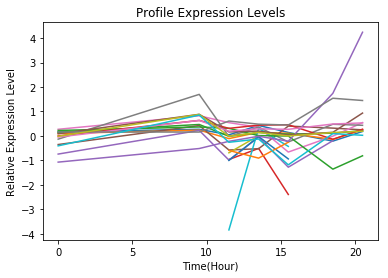

In [5]:
#查看前20个基因位的表达水平分布图
for i in range(0,20):
    plt.plot([0,9.5,11.5,13.5,15.5,18.5,20.5],data[i])
    plt.xlabel('Time(Hour)')
    plt.ylabel('Relative Expression Level')
    plt.title('Profile Expression Levels')
plt.show()

# 4.数据清洗

In [6]:
dataset = dataset[~dataset['gene'].str.contains('EMPTY')]#删除‘EMPTY’数据
dataset

,gene,0,9.5,11.5,13.5,15.5,18.5,20.5
0,'GENOMIC 1X',0.165,0.272,0.046,0.429,0.143,-0.211,0.183
1,'GENOMIC 0.5X',0.101,0.237,-0.109,0.149,0.111,-0.140,0.252
2,'GENOMIC 0.25X',0.150,0.469,-0.015,0.144,0.072,0.115,0.215
4,'PNCA',-0.741,0.227,-0.986,-0.048,-1.277,-0.194,NaN
5,'LAMBDA',-0.351,0.425,-0.574,-0.522,0.404,0.320,0.249
...,...,...,...,...,...,...,...,...
6388,'YIL154C',-0.539,-0.264,-0.004,-0.425,-0.378,0.063,0.457
6389,'YIL172C',-0.193,-0.121,0.474,-0.171,0.130,0.749,1.187
6397,'GENOMIC 0.25X',0.132,0.090,-0.217,-0.117,0.250,-0.021,0.095
6398,'GENOMIC 0.5X',0.231,0.218,0.044,0.028,0.252,-0.357,0.125


In [7]:
#dataset1 = dataset.dropna()#删除含NaN的行
#dataset1
#dataset1= dataset.iloc[ : ,1:8].values
#from sklearn.impute import SimpleImputer
#import numpy as np
#si = SimpleImputer(missing_values =np.nan, strategy = "mean")  # axis = 0表示数据是按列处理的。按行处理的话，axis = 1
#si = si.fit(dataset1)  # 先fit，相当于匹配上数据（类似于train，但是又不是真正的训练，所以用匹配较好）
dataset1=dataset.interpolate(kind='linear')
dataset1

,gene,0,9.5,11.5,13.5,15.5,18.5,20.5
0,'GENOMIC 1X',0.165,0.272,0.046,0.429,0.143,-0.211,0.183
1,'GENOMIC 0.5X',0.101,0.237,-0.109,0.149,0.111,-0.140,0.252
2,'GENOMIC 0.25X',0.150,0.469,-0.015,0.144,0.072,0.115,0.215
4,'PNCA',-0.741,0.227,-0.986,-0.048,-1.277,-0.194,0.232
5,'LAMBDA',-0.351,0.425,-0.574,-0.522,0.404,0.320,0.249
...,...,...,...,...,...,...,...,...
6388,'YIL154C',-0.539,-0.264,-0.004,-0.425,-0.378,0.063,0.457
6389,'YIL172C',-0.193,-0.121,0.474,-0.171,0.130,0.749,1.187
6397,'GENOMIC 0.25X',0.132,0.090,-0.217,-0.117,0.250,-0.021,0.095
6398,'GENOMIC 0.5X',0.231,0.218,0.044,0.028,0.252,-0.357,0.125


In [8]:
dataset2=dataset1.drop_duplicates(subset=['gene'])#删除重复值
dataset2

,gene,0,9.5,11.5,13.5,15.5,18.5,20.5
0,'GENOMIC 1X',0.165,0.272,0.046,0.429,0.143,-0.211,0.183
1,'GENOMIC 0.5X',0.101,0.237,-0.109,0.149,0.111,-0.140,0.252
2,'GENOMIC 0.25X',0.150,0.469,-0.015,0.144,0.072,0.115,0.215
4,'PNCA',-0.741,0.227,-0.986,-0.048,-1.277,-0.194,0.232
5,'LAMBDA',-0.351,0.425,-0.574,-0.522,0.404,0.320,0.249
...,...,...,...,...,...,...,...,...
6379,'NORF 88',0.167,0.029,0.085,0.145,0.498,0.333,0.921
6380,'NORF 90',0.021,-0.028,-0.133,-0.139,0.176,-0.122,0.170
6381,'NORF 92',-0.197,-0.275,-0.467,-0.338,-0.237,0.074,0.733
6382,'NORF 94',-0.379,-0.124,-0.303,-0.154,-0.209,-0.399,0.606


In [9]:
dataset21=dataset1.copy()
dataset21.drop_duplicates(subset=['gene'],keep='first',inplace=True)#删除重复值
dataset21

,gene,0,9.5,11.5,13.5,15.5,18.5,20.5
0,'GENOMIC 1X',0.165,0.272,0.046,0.429,0.143,-0.211,0.183
1,'GENOMIC 0.5X',0.101,0.237,-0.109,0.149,0.111,-0.140,0.252
2,'GENOMIC 0.25X',0.150,0.469,-0.015,0.144,0.072,0.115,0.215
4,'PNCA',-0.741,0.227,-0.986,-0.048,-1.277,-0.194,0.232
5,'LAMBDA',-0.351,0.425,-0.574,-0.522,0.404,0.320,0.249
...,...,...,...,...,...,...,...,...
6379,'NORF 88',0.167,0.029,0.085,0.145,0.498,0.333,0.921
6380,'NORF 90',0.021,-0.028,-0.133,-0.139,0.176,-0.122,0.170
6381,'NORF 92',-0.197,-0.275,-0.467,-0.338,-0.237,0.074,0.733
6382,'NORF 94',-0.379,-0.124,-0.303,-0.154,-0.209,-0.399,0.606


In [10]:
dataset21.sort_values(['gene'],inplace=True)
dataset21.reset_index(drop=True,inplace=True)
dataset21

,gene,0,9.5,11.5,13.5,15.5,18.5,20.5
0,'E. COLI #10',-0.013,0.880,-0.009,0.144,-0.001,0.140,0.192
1,'E. COLI #33',-0.405,0.853,-0.259,-0.124,-1.181,0.095,0.027
2,'E. COLI #35',0.048,0.889,0.014,0.057,-0.334,0.091,-0.133
3,'E. COLI #36',-0.416,0.736,-0.291,-0.098,-0.661,0.077,0.119
4,'E. COLI #40',0.006,0.605,-0.139,0.155,-0.275,0.264,0.076
...,...,...,...,...,...,...,...,...
6208,'YPR200C',-0.467,-0.409,0.082,-0.309,0.210,0.123,0.469
6209,'YPR201W',-0.384,-0.327,0.343,0.071,-0.267,0.704,0.561
6210,'YPR202W',0.052,0.006,-0.004,0.048,-0.073,-0.988,0.667
6211,'YPR203W',0.108,0.115,-0.194,0.021,-0.150,-0.577,0.096


In [11]:
data = dataset2.iloc[:,1:8].values#分出基因信息
data

array([[ 0.165,  0.272,  0.046, ...,  0.143, -0.211,  0.183],
       [ 0.101,  0.237, -0.109, ...,  0.111, -0.14 ,  0.252],
       [ 0.15 ,  0.469, -0.015, ...,  0.072,  0.115,  0.215],
       ...,
       [-0.197, -0.275, -0.467, ..., -0.237,  0.074,  0.733],
       [-0.379, -0.124, -0.303, ..., -0.209, -0.399,  0.606],
       [-0.087, -0.037, -0.282, ..., -0.443, -0.934, -0.912]])

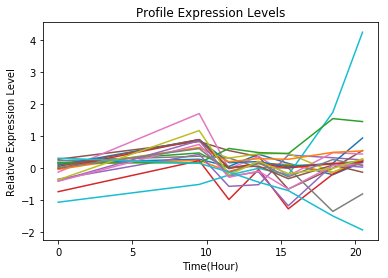

In [12]:
#查看前20个基因位的表达水平分布图
for i in range(0,20):
    plt.plot([0,9.5,11.5,13.5,15.5,18.5,20.5],data[i])
    plt.xlabel('Time(Hour)')
    plt.ylabel('Relative Expression Level')
    plt.title('Profile Expression Levels')
plt.show()

# 5.数据集可视化1

In [13]:
dataset3 = dataset2.iloc[:,1:8].values#分出基因数据

In [14]:
dataset3 

array([[ 0.165,  0.272,  0.046, ...,  0.143, -0.211,  0.183],
       [ 0.101,  0.237, -0.109, ...,  0.111, -0.14 ,  0.252],
       [ 0.15 ,  0.469, -0.015, ...,  0.072,  0.115,  0.215],
       ...,
       [-0.197, -0.275, -0.467, ..., -0.237,  0.074,  0.733],
       [-0.379, -0.124, -0.303, ..., -0.209, -0.399,  0.606],
       [-0.087, -0.037, -0.282, ..., -0.443, -0.934, -0.912]])

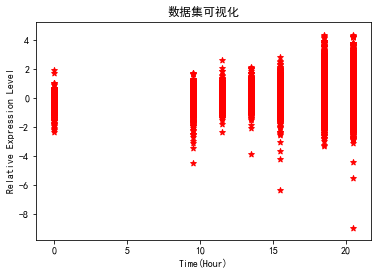

In [15]:
#数据集可视化，未删除冗余基因信息的数据
for i in range(0,6178):
    plt.scatter([0,9.5,11.5,13.5,15.5,18.5,20.5],dataset3[i],
                c = 'red',marker= '*',label = 'iris flower')
    plt.xlabel('Time(Hour)')
    plt.ylabel('Relative Expression Level')
    plt.title('数据集可视化')
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
plt.show()

# 6.数据集可视化2

In [16]:
dataset4 = pd.read_csv('yeasedata1.csv')
dataset4
dataset5 = dataset4.iloc[:,1:8].values#分出基因数据----614行数据
dataset5
dataset6 = pd.read_csv('yeasedata1.csv')
dataset6
dataset7 = dataset4.iloc[:,1:4].values#分出基因数据----614行数据
dataset7

array([[-0.131,  1.699, -0.026],
       [ 0.305,  0.146, -0.129],
       [ 0.157,  0.175,  0.467],
       ...,
       [ 0.074,  0.535,  1.603],
       [-0.195,  0.165, -0.333],
       [-0.247,  0.11 ,  0.042]])

In [17]:
dataset5

array([[-0.131,  1.699, -0.026, ..., -0.246,  0.478,  0.435],
       [ 0.305,  0.146, -0.129, ..., -0.707, -1.499, -1.935],
       [ 0.157,  0.175,  0.467, ..., -0.52 , -1.279, -2.125],
       ...,
       [ 0.074,  0.535,  1.603, ...,  1.58 ,  0.933,  2.044],
       [-0.195,  0.165, -0.333, ...,  0.858,  1.633,  3.028],
       [-0.247,  0.11 ,  0.042, ...,  1.07 ,  0.845,  2.328]])

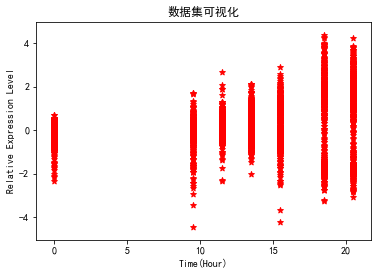

In [18]:
#数据集可视化，删除了冗余基因信息的数据
for i in range(0,614):
    plt.scatter([0,9.5,11.5,13.5,15.5,18.5,20.5],dataset5[i], 
                c = 'red',marker= '*',label = 'iris flower')
    plt.xlabel('Time(Hour)')
    plt.ylabel('Relative Expression Level')
    plt.title('数据集可视化')
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
plt.show()

## 7.相关性分析

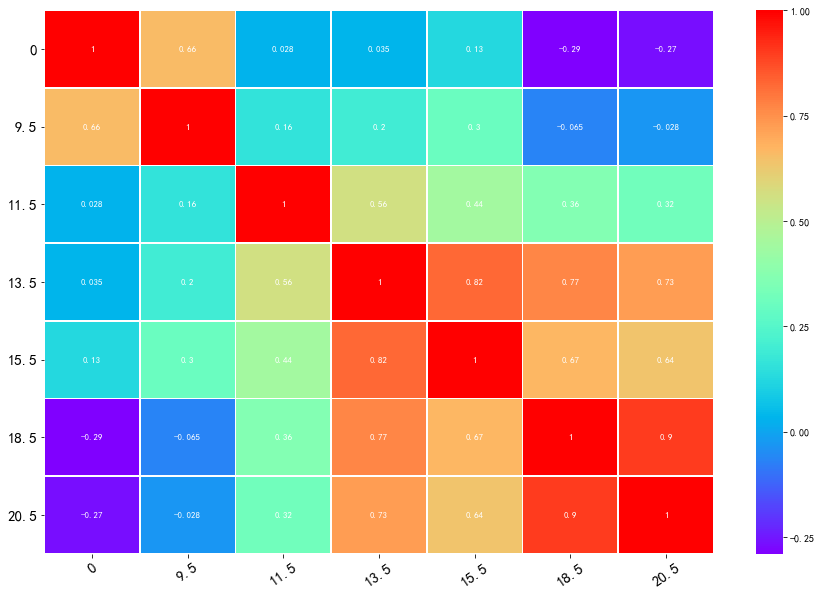

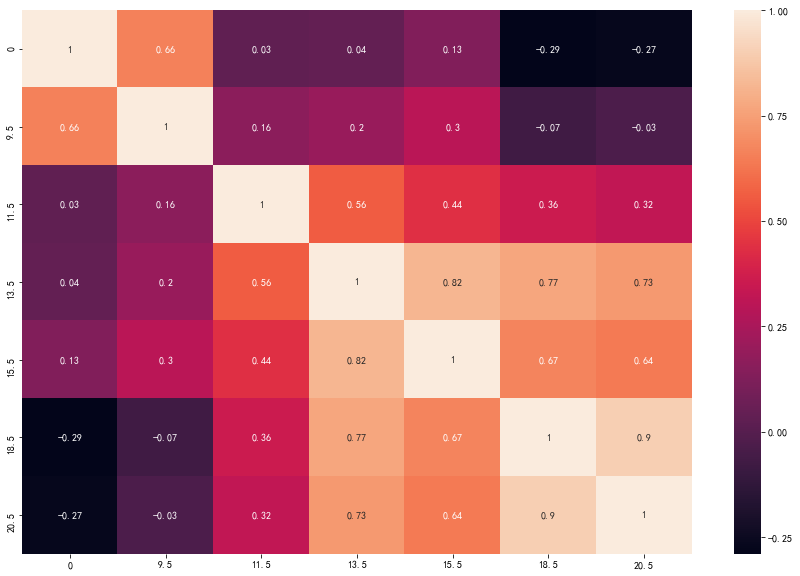

In [19]:
import seaborn as sns
corr =dataset4.corr()#计算各变量的相关性系数
xticks = list(corr.index)#x轴标签
yticks = list(corr.index)#y轴标签
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap="rainbow",ax=ax1,linewidths=.5, annot_kws={'size': 9, 'weight': 'bold', 'color': 'white'})
ax1.set_xticklabels(xticks, rotation=35, fontsize=15)
ax1.set_yticklabels(yticks, rotation=0, fontsize=15)
plt.show()
r=dataset4.corr()#相关系数
r=r.round(2)
plt.figure(figsize=(15,10))
sns.heatmap(data=r,annot=True)

# 8.层次聚类

In [20]:
#导入相关的库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch #用于进行层次聚类，画层次聚类图的工具包
import scipy.spatial.distance as ssd
from scipy.cluster.vq import vq,kmeans,whiten
import numpy as np

In [21]:
dataset6 = dataset5[0:20,1:8]#只要前20行数据-为了让树形图看起来更加直观

In [22]:
#生成点与点之间的距离矩阵,这里用的欧氏距离:
disMat_1 = sch.distance.pdist(dataset6,'euclidean') 

In [23]:
#进行层次聚类:
Z_1=sch.linkage(disMat_1,method='average') 

In [24]:
Z_1

array([[ 1.        , 12.        ,  0.36651876,  2.        ],
       [15.        , 20.        ,  0.39548633,  3.        ],
       [ 3.        ,  6.        ,  0.52634494,  2.        ],
       [ 8.        , 10.        ,  0.57947476,  2.        ],
       [ 2.        , 21.        ,  0.62246135,  4.        ],
       [ 7.        , 24.        ,  0.86125866,  5.        ],
       [13.        , 18.        ,  0.92580127,  2.        ],
       [17.        , 26.        ,  1.03237199,  3.        ],
       [19.        , 27.        ,  1.41994223,  4.        ],
       [22.        , 23.        ,  1.42919091,  4.        ],
       [ 5.        , 29.        ,  1.54115523,  5.        ],
       [28.        , 30.        ,  1.72098287,  9.        ],
       [ 4.        , 11.        ,  1.8268013 ,  2.        ],
       [ 9.        , 16.        ,  2.21824413,  2.        ],
       [31.        , 32.        ,  2.37914989, 11.        ],
       [ 0.        , 33.        ,  2.93590483,  3.        ],
       [14.        , 34.

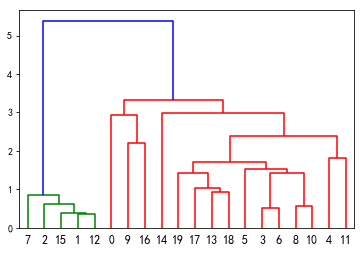

In [25]:
#将层级聚类结果以树状图表示出来
P=sch.dendrogram(Z_1)

In [26]:
#生成点与点之间的距离矩阵,这里用的欧氏距离:
disMat = sch.distance.pdist(dataset5,'euclidean') 
#进行层次聚类:
Z=sch.linkage(disMat,method='average') 
cluster= sch.fcluster(Z, t=16, criterion='maxclust')

In [27]:
disMat

array([3.60623696, 3.59413828, 2.23458229, ..., 2.64924461, 1.91640705,
       1.17107259])

In [28]:
cluster

array([ 6,  1,  1,  9,  9,  9,  9,  1,  9,  5,  9,  9,  1,  9, 11,  1,  4,
        9, 11,  9,  9,  9,  1,  5,  5,  5,  5,  6,  9,  9,  1,  9,  1, 12,
        9,  9,  1,  9,  9,  1,  9,  9,  9,  9,  9,  1,  9,  1, 11,  9,  1,
        9,  1,  9, 11,  5,  6,  5,  5, 14,  5,  5, 14,  9,  7,  9,  1,  1,
        9, 16,  9,  1,  1,  9,  9,  4, 11,  3,  9,  9,  9,  5,  9,  1,  9,
        9,  9,  9, 11,  9,  9,  9,  9, 13,  1,  1,  9, 11,  1,  1,  9, 11,
        9,  5, 11,  1,  1,  9,  9,  9,  9,  9,  5,  1,  9,  9,  9,  1, 11,
        9,  1,  1,  9,  1,  1,  1,  1,  1,  1,  1,  1,  1,  9,  5,  9,  5,
        9,  9,  1,  9,  5,  1,  5,  1,  9,  9,  1,  1,  1,  9,  1,  4,  6,
       10,  9,  9,  1, 11,  9,  6,  1,  9,  9,  9, 11,  9,  1,  6,  9,  6,
        9,  1,  1, 11,  9,  9,  1,  9,  1,  9,  1,  9,  9,  9,  9, 10,  1,
       11,  1,  9,  1, 11,  4,  4,  9,  9,  1,  1, 11,  1,  9, 11,  9,  9,
       11,  5,  1,  9,  9,  9,  1,  9,  5, 11,  1,  9,  9, 10,  1,  9,  9,
        9, 10,  9,  9,  1

In [29]:
from sklearn import metrics
metrics.silhouette_score(dataset5, cluster, metric='cosine')

0.00248712385790475

In [30]:
y=[[0 for k in range(16)] for n in range(1000)]#将数据切为16部分
for k in range(0,16):
    y[k]=dataset5[cluster==k+1]

Text(0.5,0.98,'层次聚类')

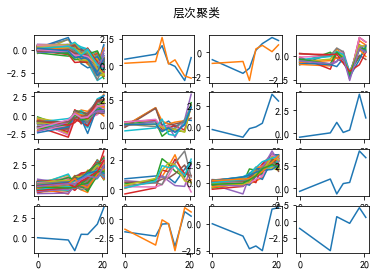

In [31]:
#绘制基因模式图
for l in range(0,16):
    plt.subplot(4,4,l+1)
    for o in range(0,len(y[l])):
        plt.plot([0,9.5,11.5,13.5,15.5,18.5,20.5],y[l][o])
plt.suptitle('层次聚类')

# 9.K-means聚类

In [32]:
#导入相关的库
from sklearn.cluster import KMeans

In [33]:
estimator = KMeans(n_clusters= 16) # 构造一个聚类器，我们设置聚类的数据，K=16

In [34]:
estimator.fit(dataset5)   # 这里的fit直接对dataset5这个数据进行聚类

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
label = estimator.labels_#聚类的输出结果之一就是对象的类目标签
label

array([ 9,  6, 15, 11,  4, 12, 12, 15,  1,  8,  1,  4, 15,  7, 10, 15,  2,
        7,  7,  4,  4, 12,  6,  8,  8,  8,  8,  9,  4,  1, 15, 12,  6,  3,
        4,  4,  0,  7,  4, 13,  4,  7,  7,  4, 12,  6,  4, 15,  3,  7, 13,
        4,  0, 11, 10,  8,  9,  8,  8, 14,  8, 14, 14,  1,  3, 12,  6,  6,
        1,  8, 12, 15, 15, 12, 11,  2,  7,  8,  4,  1, 12,  8,  4,  6, 12,
       11, 12, 12,  3, 12,  4,  4,  1,  5,  6, 15, 12,  7,  6, 15,  7,  7,
       12,  5,  7,  0, 15,  4,  7,  5,  4,  8,  8, 15, 12, 12,  1,  0,  3,
        1,  0, 13,  7, 13,  0, 15, 13, 13,  6, 13, 15,  6,  1,  8,  7,  5,
        4,  7, 15, 12,  8, 13,  8, 13,  1,  1,  6, 13,  0,  1,  0,  2,  9,
        1,  1, 12, 15,  3,  4,  9,  0,  5, 12,  7,  3,  1, 15,  9, 12,  9,
        7, 13,  6, 10,  1,  1,  6, 12,  6,  5,  0,  1,  4,  4,  7, 11,  6,
        7,  0,  1,  0,  3,  2,  2,  7,  4,  0, 15,  7,  0, 12,  3,  1,  4,
        7,  8, 15,  4,  7,  5,  0, 12,  4,  3, 13, 12, 12, 11, 13,  1,  1,
        4, 11,  7,  7, 15

In [36]:
from sklearn.metrics import calinski_harabasz_score
print(calinski_harabasz_score(dataset5, estimator.predict(dataset5)))

324.5398452665645


In [37]:
# 首先把数据切分成16部分 
x=[[0 for i in range(16)] for j in range(1000)]
for i in range(0,16):
    x[i]=dataset5[label==i]

In [38]:
np.shape(dataset7)

(614, 3)

In [39]:
np.shape(dataset5)

(614, 7)

C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Add

C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Add

C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Add

C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Add

C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Add

C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Add

C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Add

C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Add

C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Add

C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Add

C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Add

C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Add

C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Add

C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Add

C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Add

Text(0.5,0.98,'K-means聚类')

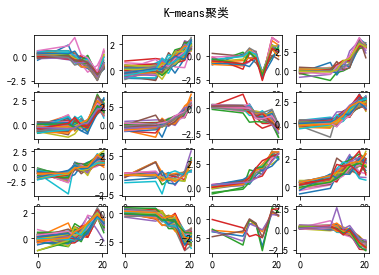

In [40]:
#对所有的16部分进行可视化
plt.figure(16)
for j in range(0,16):
    for i in range(0,len(x[j])):
        plt.subplot(4,4,j+1)
        plt.plot([0,9.5,11.5,13.5,15.5,18.5,20.5],x[j][i])
plt.suptitle('K-means聚类')

Text(0.5,0.98,'K-means方法统一后的模式图')

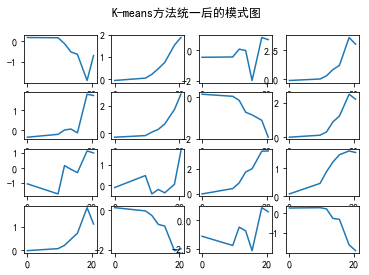

In [41]:
m=estimator.cluster_centers_#聚类中心
for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.plot([0,9.5,11.5,13.5,15.5,18.5,20.5],m[i])
plt.suptitle('K-means方法统一后的模式图')

In [42]:
from sklearn import metrics
metrics.silhouette_score(dataset7, label, metric='cosine')

-0.4249848548784987

# 10.EM聚类算法

In [43]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=16, covariance_type='full', max_iter=100)

In [44]:
gmm.fit(dataset5)
prediction = gmm.predict(dataset5)
print(prediction)

[15 11  6  8 15 10  8  6 14  9 10 15  6  7  0  1  4  2  7  7 15 10 11  9
 12  9 12 15 10  8  1  8  6  0 15 15  4  7 10 11 10  0  2 10  8 11 15  6
  0  2 11 10  1  8  0  9  5  9 12 13 12  9 13  2  0  8  6 11 14 12  8  6
  6 10  3  4 14 12  7 14  8  9 10 11  8  7  8  8  3 14 10 15  8 14 11 11
 10  0  6  6  2  3  8 14  7  1  6 10  7  2 10 12 12  6  8  8  2  1  3  8
  1 11  2 11 11  6 11 11  6 11  6  6  2 12  2 14 10  2  6  8  9 11 12  1
  2  2  6 11 11  7  1  4  5 15  8  8  1  3 10  5  1 15 15  7  0  7  6 15
  8  5  7 11 11  0 15 10 11 15  6 15  1  8 15 10  2  3  6  7  1  2  1  3
  4  4  7 15  1  1  2  1  8  0 10 10  3 12  6 10  2 14 11  8 12  3 11  8
  8  3 11  2  2 15  3  2  2 11  1 12  2  2 14 15 11  8  8  4 10  2 10  5
 10  0  4  2 11  1  6  6  6  8  0  2 14 10  2  2  2 10  6  4 11  6  1  0
 11 10  0 12 10 11 12 11  4 11  2 11 11  0  1 11  0 10 11  4  3  6  8 10
  8  2  8  2  6  7  1 10 10  1 12  3  2  7  8  1  1  5 11  3 11 10 10  1
  8  1 10  2  2  2  4 11  2 10  2  4  9  6  3  9  2

In [45]:
from sklearn.metrics import calinski_harabasz_score
print(calinski_harabasz_score(dataset5, prediction))

252.7377395348436


# 11.评估模型-簇数聚类效果评估

## 11.1轮廓系数

In [46]:
from sklearn import metrics
metrics.silhouette_score(dataset5, label, metric='cosine')

0.015414471204436652

In [47]:
dataset5

array([[-0.131,  1.699, -0.026, ..., -0.246,  0.478,  0.435],
       [ 0.305,  0.146, -0.129, ..., -0.707, -1.499, -1.935],
       [ 0.157,  0.175,  0.467, ..., -0.52 , -1.279, -2.125],
       ...,
       [ 0.074,  0.535,  1.603, ...,  1.58 ,  0.933,  2.044],
       [-0.195,  0.165, -0.333, ...,  0.858,  1.633,  3.028],
       [-0.247,  0.11 ,  0.042, ...,  1.07 ,  0.845,  2.328]])

In [ ]:
from sklearn.metrics import silhouette_score
score = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset5)
    label = kmeans.labels_
    s=metrics.silhouette_score(dataset5, label, metric='cosine')
    print(s)
    score.append(metrics.silhouette_score(dataset5, label, metric='cosine'))
    #print(kmeans.fit(dataset5).labels_)
    #print(y_)# 预测类别 == 标签
#     plt.scatter(X[:,0],X[:,1],c = y_)
    #score.append(silhouette_score( kmeans.fit(dataset5).labels_.reshape(1, -1),y_))
#     print('当聚类类别是6的时候，评价指标轮廓系数： ',silhouette_score(X,y_))
plt.plot(range(2,20),score)
plt.xlabel('簇的个数')
plt.ylabel('轮廓系数')
# 结论：，当k值是3的时候，轮廓系数最大，这个时候，说明划分效果最好！

0.8549942112669968
0.6654236594711697
0.25504079259914614
0.22310512957165576
0.25203532072594526

## 11.2调整兰德系数

In [ ]:
from sklearn import metrics
y_ = kmeans.predict(dataset5)
metrics.adjusted_rand_score(kmeans.fit(dataset5).labels_,y_) 

In [ ]:
from sklearn import metrics
from matplotlib.pyplot import MultipleLocator
score = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset5)
    y_ = kmeans.predict(dataset5)# 预测类别 == 标签
    
    s=metrics.adjusted_rand_score(kmeans.fit(dataset5).labels_,y_) 
    print(s)
    score.append(metrics.adjusted_rand_score(kmeans.fit(dataset5).labels_,y_))
plt.plot(range(2,20),score)
x_major_locator=MultipleLocator(2)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlabel('簇的个数')
plt.ylabel('调整兰德系数')# 结论：，当k值是3的时候，轮廓系数最大，这个时候，说明划分效果最好！

## 11.3CH分数

In [ ]:
from sklearn.metrics import calinski_harabasz_score
print(calinski_harabasz_score(dataset5, prediction))

In [ ]:
from sklearn import metrics
from matplotlib.pyplot import MultipleLocator
score = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset5)
    y_ = kmeans.predict(dataset5)# 预测类别 == 标签
    
    s=calinski_harabasz_score(dataset5, y_) 
    print(s)
    score.append(calinski_harabasz_score(dataset5,y_))
plt.plot(range(2,20),score)
x_major_locator=MultipleLocator(2)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlabel('簇的个数')
plt.ylabel('CH分数')

## 11.4手肘法

In [ ]:
def k_SSE(X, clusters):
    # 选择连续的K种不同的值
    K = range(2,clusters+5)
    # 构建空列表用于存储总的簇内离差平方和
    TSSE = []
    for k in K:
        # 用于存储各个簇内离差平方和
        SSE = []
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        # 返回簇标签
        labels = kmeans.labels_
        # 返回簇中心
        centers = kmeans.cluster_centers_
        # 计算各簇样本的离差平方和，并保存到列表中
 
        SSE.append(kmeans.inertia_)
        # 计算总的簇内离差平方和 
        TSSE.append(np.sum(SSE))
    print(TSSE)
    plt.xlabel('簇的个数')
    plt.ylabel('SSE')
    plt.plot(K,TSSE,'o-')
    plt.show 

In [ ]:
k_SSE(dataset5,18)

## 11.5间隔量统计法

In [ ]:
def short_pair_wise_D(each_cluster):
    mu = each_cluster.mean(axis = 0)
    Dk = sum(sum((each_cluster - mu)**2)) * 2.0 * each_cluster.shape[0]
    return Dk

# 计算簇内的Wk值
def compute_Wk(data, classfication_result):
    Wk = 0
    label_set = set(classfication_result)
    for label in label_set:
        each_cluster = data[classfication_result == label, :]
        Wk = Wk + short_pair_wise_D(each_cluster)/(2.0*each_cluster.shape[0])
    return Wk

# 计算GAP统计量 
def gap_statistic(X, B=50, K=range(10,20), N_init = 10):
    # 将输入数据集转换为数组
    X = np.array(X)
    # 生成B组参照数据
    shape = X.shape
    tops = X.max(axis=0)
    bots = X.min(axis=0)
    dists = np.matrix(np.diag(tops-bots))
    rands = np.random.random_sample(size=(B,shape[0],shape[1]))
    for i in range(B):
        rands[i,:,:] = rands[i,:,:]*dists+bots
    
    # 自定义0元素的数组，用于存储gaps、Wks和Wkbs
    gaps = np.zeros(len(K))
    Wks = np.zeros(len(K))
    Wkbs = np.zeros((len(K),B))
    # 循环不同的k值，
    for idxk, k in enumerate(K):
        k_means =  KMeans(n_clusters=k)
        k_means.fit(X)
        classfication_result = k_means.labels_
        # 将所有簇内的Wk存储起来
        Wks[idxk] = compute_Wk(X,classfication_result)
        
        # 通过循环，计算每一个参照数据集下的各簇Wk值
        for i in range(B):
            Xb = rands[i,:,:]
            k_means.fit(Xb)
            classfication_result_b = k_means.labels_
            Wkbs[idxk,i] = compute_Wk(Xb,classfication_result_b)

    # 计算gaps、sd_ks、sk和gapDiff
    gaps = (np.log(Wkbs)).mean(axis = 1) - np.log(Wks)        
    sd_ks = np.std(np.log(Wkbs), axis=1)
    sk = sd_ks*np.sqrt(1+1.0/B)
    # 用于判别最佳k的标准，当gapDiff首次为正时，对应的k即为目标值
    gapDiff = gaps[:-1] - gaps[1:] + sk[1:]
     
    # 中文和负号的正常显示
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    plt.rcParams['axes.unicode_minus'] = False
    # 设置绘图风格
    plt.style.use('ggplot')
    # 绘制gapDiff的条形图
    plt.bar(np.arange(len(gapDiff))+10, gapDiff, color = 'steelblue')
    plt.xlabel('簇的个数')
    plt.ylabel('gap difference')
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.show()


In [ ]:
gap_statistic(dataset5) 